# Using satellite data to monitor urban green space
### Joe Fennell, September 2021
In this activity, we will look at the use of satellite data to address the United Nations' Sustainable Development Goals (SDGs) through a mixture of learning material and experimentation with real data. This will take you about 1 hour to work through.

| ![Sentinel 2](images/Sentinel-2.jpg) |
|:---:|
|*Sentinel-2 Satellite. Image from the European Space Agency*|

## 1. How to access this resource 
This learning resource is a [Jupyter Notebook](https://jupyter.org/). It brings together text, images and code, allowing us to try out techniques alongside the relevant information. I have used the [Python](https://www.python.org/) programming language to produce this but you don't need to know Python to use this resource.

A Jupyter Notebook can either be used *statically* (you can only view the contents) or *dynamically* (you can run, alter, re-run and interact with the Python code within the notebook). You can do many useful things with Jupyter Notebooks and [there is a useful demonstration Notebook here](https://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Notebook%20Basics.ipynb) that explains the different features.

If you are reading this information on the GitHub website or in another *static* format, you won't be able to use the interactive features. If you would like to interact with the experiments below, please click: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/joe-fennell/eo-for-sdgs/blob/main/1_FirstSteps.ipynb) to open the Jupyter Notebook in Google Colaboratory. This sometimes requires you to log in to a google account but once you have created an account and logged in, it is free to use. Alternatively, you can view a static version [![Open In NBViewer](https://img.shields.io/badge/render-nbviewer-orange.svg)](https://nbviewer.jupyter.org/github/joe-fennell/eo-for-sdgs/blob/main/1_FirstSteps.ipynb)

**Important:** Once you have opened this activity in Google Colaboratory it is important to run the entire notebook before continuing. Do this now by clicking `Runtime > Run all` in the menu above.

>Note: if you double click on this cell, you will view the markdown code instead of the rendered text. Simply re-run the cell or the whole notebook (see above) to return it to the original state.

![im.1](images/jlabs_run_nb.png)

## 2. Learning Outcomes
After studying this material, you should be able to:
- Use a Jupyter Notebook learning resource to learn about new concepts
- Recall and summarise an application of remote sensing in the UK's environmental strategy
- Apply simple image analysis techniques to optical remote sensing data

## 3. A UK Case Study for Monitoring with Remote Sensing: Biodiversity Net Gain
The UK Government has recently introduced a policy called Biodiversity Net Gain. This provides a framework for building developers to prevent loss (and ideally increase) the quality and quantity of habitats alterered by construction.

Natural England (a government agency) explain the concept in [this video](https://www.youtube.com/watch?v=loDGyw_jh1s).

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/loDGyw_jh1s/0.jpg)](https://www.youtube.com/watch?v=loDGyw_jh1s)

**Question: Which of the UN Sustainable Development subgoals could be achieved through a policy such as this?** Make a note of all that you think apply before checking the suggestions below. Hint: [UN SDG Website](https://www.globalgoals.org/) 

<details>
<summary>
Show answers
</summary>

|    |Life on Land| | Sustainable Cities|
|:---|:---|:---|:---|
| ![SDG15.1](https://images.prismic.io/globalgoals%2F5d08ea5a-c0b5-49a4-993d-40bd2f3d46f9_goal_15.1_rgb_ng.svg?auto=compress,format) | 15.1: Conserve and restore <br /> terrestrial and freshwater ecosystems | ![SDG11.6](https://images.prismic.io/globalgoals%2Fe2c7c5dc-973d-48d4-aa46-606fc9e24961_goal_11.4_rgb_ng.svg?auto=compress,format) | 11.6: Reduce the environmental impact of cities |
| ![SDG15.5](https://images.prismic.io/globalgoals%2F5d08ea5a-c0b5-49a4-993d-40bd2f3d46f9_goal_15.1_rgb_ng.svg?auto=compress,format) | 15.5 Protect Biodiversity <br /> and Natural Habitats  | ![SDG11.7](https://images.prismic.io/globalgoals%2Fa734a3ab-0cb8-4252-8479-318b3446a0c3_goal_11.7_rgb_ng.svg?auto=compress,format) | 11.7: Provide access to safe and inclusive green and public spaces |
| ![SDG15.9](https://images.prismic.io/globalgoals%2F4873dc0f-0980-46f0-8186-a4a6b3d9e693_goal_15.9_rgb_ng.svg?auto=compress,format) | 15.9: Integrate Ecosystem <br />and Biodiversity in government planning | | |

>Although, as is often the case, many of the SDGs may apply indirectly to biodiversity protection and habitat restoration, these are the most relevant to the policy.
<p>&nbsp;</p>
</details>
<p>&nbsp;</p>

Whilst the policy may support sustainable development, a key risk is that it requires detailed, quantified assessment of the ecosystem in order for the scheme to work. Whilst it has been argued that Biodiversity Net Gain is better than no action on biodiversity loss, observers have noted that

> "Outsourcing of the delivery of environmental goods through a mix of regulation and incentive is not adequately resourced to ensure regulatory authorities are able to monitor the process."
> <cite>[(Knight-Lenihan, 2020)][1]</cite>

[1]: https://rdcu.be/cyob0

Both the initial assessment for a planning application, and compliance monitoring by government agencies, is labour-intensive, expensive and potentially open to corruption. Because of this, there is considerable interest in the use of **Remote Sensing** to automate some parts of the process. In the rest of this activity, we will look at the use of a specific remote sensing technique to identify different habitat types in an urban area.

## 4. A Brief Introduction to Remote Sensing
One of the key challenges in environmental science is measuring the properties of the Earth's surface in order to understand the processes that shape it. However, even in accessible areas, carrying out this work on the ground has always been expensive and difficult. One solution is to measure properties of the surface remotely with a sensor or array of sensors. This is **Remote Sensing**.

There are many different types of sensing technology but we will focus on optical imaging. A camera, such as the one on your phone, is an example of an optical imaging system. A camera collects light through a lens and projects it onto an imaging sensor. The sensor accumulates light in each pixel and converts this into an electrical signal. This is read by the camera electronics and converted into values (sometimes referred to as Digital Number values) proportional to the amount of light collected by each pixel.

Just like human eyes, most camera sensors are designed to measure not only the overall brightness, but the brightness of specific wavebands. A colour camera measures red, green and blue light independently. Some systems measure more colours or colours in different parts of the electromagnetic spectrum. We normally refer to these as multispectral or hyperspectral systems.

Cameras can be mounted on various craft including Unmanned Aerial Vehicles (UAVs), planes and satellites. One particularly useful earth observation system is The European Space Agency's Sentinel 2 constellation.

| ![Sentinel 2](images/Sentinel-2.jpg) |
|:---:|
| *An artists impression of one of the Sentinel-2 satellites in an imaging orbit. Image from the European Space Agency* |

The pair of Sentinel 2 satellites constantly orbit the earth in a sun-synchronous orbit (following the daylight), allowing the constellation to capture an image of the same point on the earth every 6 days. The imagery is processed automatically and made available to everyone for free.

## 5. Sentinel 2 data exploration activity
We will now use Python to load in some example Sentinel 2 imagery of London and do a simple analysis. If you have not already done so, please run the notebook so you can interact with the data (see section 2, above).

In [1]:
# This is a code cell, it contains instructions in the Python coding language.
# The grey area is the code input area and the white area below displays the outputs.
# The cell can be re-run by pressing shift-enter
# -----------------------------------------------
# Boiler plate imports
# %matplotlib inline

from ipywidgets import *
import matplotlib.pyplot as plt
import numpy as np
import os
from IPython import display

# Some google colaboratory specific instructions

dpath = 'eo-for-sdgs/data/S2_London.npy'

try:
    from google.colab import files
    !git clone https://github.com/joe-fennell/eo-for-sdgs/
    
except ModuleNotFoundError:
    dpath = 'data/S2_London.npy'

# A function for doing image histogram equalisation
def image_histogram_equalisation(image):
    """ Performs an image histogram equalisation
    
    Parameters
    ----------
    image : array-like
        image must have 3 dimensions with band in the 3rd dimension
    
    Returns
    -------
    image_corrected : array
        equalised image of same shape as input
    
    """
    # get image histogram
    image_histogram, bins = np.histogram(image.flatten(), 256, density=True)
    cdf = image_histogram.cumsum() # cumulative distribution function
    cdf = (255-1) * cdf / cdf[-1] # normalize

    # use linear interpolation of cdf to find new pixel values
    image_equalized = np.interp(image.flatten(), bins[:-1], cdf)
    
    if len(image.shape) == 3:
        return image_equalized.reshape(image.shape).astype('uint8')[:,:,::-1]
    else:
        return image_equalized.reshape(image.shape).astype('uint8')

# Define the pixel size a priori. We know this is 10m x 10m for these data
pixel_size = 10

# Read in the dataset and convert to float type
im = np.load(dpath).astype(float)
im.shape

(1000, 1000, 4)

After setting up our Python environment and loading in the dataset, we have inspected the shape of the new object we created (called `im`) by calling the `shape` method. This gives an output indicating the array is 1000 x 1000 pixels in the spatial dimensions and has 4 colour channels. In this case, the 4 colour channels are Blue, Green, Red and Infrared. This particular image has been processed to estimate the surface reflectance. Every value in the array is a measure of the amount of light reflected back to the sensor. These are stored as whole numbers between 0 and 10000 where 0 means no light is reflected and 10000 means 100\% of the incoming sunlight is reflected back to the sensor.

**Question: What ground area does our image cover if each pixel is 10m x 10m?**
<details>
<summary>
Show answers
</summary>


> First calculate the length in metres of each dimension by multiplying the pixel size (10m) by the number of pixels (1000): $10 \times 1000 = 10,000$, then multiply the two together to get the area: $10,000 \times 10,000= 100,000,000$m$^{2}$ or $1$km$^{2}$

<p>&nbsp;</p>
</details>
<p>&nbsp;</p>

### Visualising Sentinel 2 Imagery
Next we will plot the colour (RGB) image. The scene covers an area of central London and has various land-cover types: grass, wooded areas, buildings, concrete, water etc.

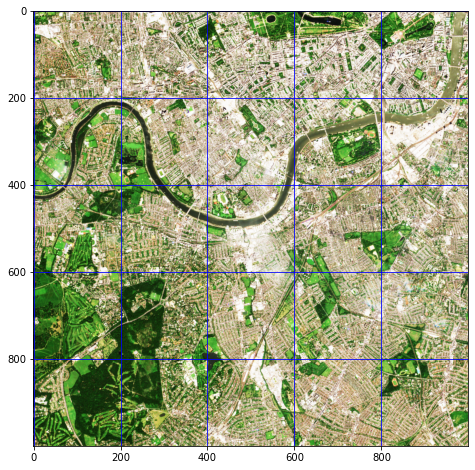

In [2]:
# This code makes a colour image plot of our Sentinel 2 Data
plt.figure(figsize=(8,8))
plt.imshow(image_histogram_equalisation(im[:,:,:3]))

# gridlines
plt.grid(color='blue')
plt.show()

We can also view the full dataset by slicing through it. Use the slider below to navigate through the different bands.

In [3]:
# Calculate the upper 97th percentile to remove outliers from colourscale
vmax = np.percentile(im, 97.5, axis=(0,1))

@interact(band=(1,4,1))
def band_explorer(band=1):
    f, ax = plt.subplots(figsize=(9,9))
    ax.imshow(im[..., band-1],
                    vmin=0,
                    vmax=vmax[band-1],
                    cmap='gray')
    labels = ['Blue', 'Green', 'Red', 'Infrared']
    ax.set_title(labels[band-1])
    

interactive(children=(IntSlider(value=1, description='band', max=4, min=1), Output()), _dom_classes=('widget-i…

Notice how the vegetation is very dark in the red and blue bands (not much light is being reflected back to the sensor) but is very bright in the infrared band (lots of the light is being reflected).

**Question: Why does vegetation appear dark in the red and blue?**
<details>
<summary>
Show answers
</summary>

    
    
> It is all down to Chlorophylls, the molecules responsible for photosynthesis. Chlorophylls absorb strongly in the Blue and Red region, using the light to power photosynthesis. Because they are very efficient at absorbing in these areas, very little light is reflected back to the sensor and so they appear dark.

    
    
| ![chlorophyll spectrum](https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Chlorophyll_ab_spectra2.PNG/507px-Chlorophyll_ab_spectra2.PNG) |
|:---:|
| *Chlorophyll absorption spectrum. Figure by Daniele Pugliesi [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/deed.en)* |

    
    
<p>&nbsp;</p>
</details>
<p>&nbsp;</p>

### Exploiting colour information to discriminate landcover classes
One simple approach for separating landcover classes is to use a spectral index and thresholding. We will cover spectral indices in more detail in later classes, however for now, it is best thought of as similar to a ratio between two or more bands. In this case, we'll use the Normalised Difference Vegetation Index. This is defined as:

$R_{NDVI}=(R_{IR}-R_{Red})/(R_{IR}+R_{Red})$

This gives values between -1 and 1, describing the ratio between Red and Infrared reflectance. This is calculated for every pixel in the image to give a new array. You can choose a useful colourmap to begin interpreting the data

In [4]:
# calculate ndvi for our im array
im_ndvi = np.ma.masked_array((im[...,3] - im[...,2]) / (im[...,3] + im[...,2]))
im_ndvi_static = im_ndvi.copy()
@interact(colourmap=['PiYG', 'gray', 'RdYlGn', 'nipy_spectral'])
def ndvi_explorer(colourmap='PiYlGn'):
    f = plt.figure(figsize=(9,9))
    plt.imshow(im_ndvi_static, cmap=colourmap)
    plt.colorbar()

interactive(children=(Dropdown(description='colourmap', options=('PiYG', 'gray', 'RdYlGn', 'nipy_spectral'), v…

Note that vegetation has high values (typically more than 0.3) whereas concrete/buildings have lower values (0.0) and water very low values ( less than -0.1). We can use this property to threshold the image in order to estimate the area of different landcover types. In the figure below, you can adjust the sliders until vegetated areas are coloured green. The water_range slider can be used to colour all water areas blue. Adjust the sliders until you are happy with the thresholding (i.e. the coloured regions appear to colour only the areas matching the class description), the plot will tell you the estimated area covered in vegetation and water in hecatares (100m x 100m).

In [5]:

@interact(veg_range=widgets.FloatRangeSlider(value=[.3, 1],
                                               min=-1,
                                               max=1,
                                               step=.001),
         water_range=widgets.FloatRangeSlider(value=[-1, -.1],
                                               min=-1,
                                               max=1,
                                               step=.001,
                                             readout_format='.2f'))
def veg_explorer(veg_range=[.3,1], water_range=[-1,-.1]):
    f, ax = plt.subplots(figsize=(9,9))
    ax.imshow(im_ndvi.base, cmap='gray')
    # veg masking first
    im_ndvi.mask = ~np.logical_and(im_ndvi.base >= veg_range[0],
                                 im_ndvi.base <= veg_range[1])
    #count 100m2 pixels and convert to ha
    veg_count = np.sum(~im_ndvi.mask) /10000
    
    ax.imshow(im_ndvi, cmap='Greens', vmax=veg_range[1]+.1)
    # water masking first
    im_ndvi.mask = ~np.logical_and(im_ndvi.base >= water_range[0],
                                 im_ndvi.base <= water_range[1])
    water_count = np.sum(~im_ndvi.mask) / 10000
    ax.imshow(im_ndvi, cmap='Blues_r', vmin=-1, vmax=water_range[1]+.2)
    ax.set_title('Vegetation: {:.2f}ha, Water: {:.2f}ha'.format(veg_count, water_count))

interactive(children=(FloatRangeSlider(value=(0.3, 1.0), description='veg_range', max=1.0, min=-1.0, step=0.00…

We can also threshold more finely within the vegetation class in order to discriminate between different types of vegetation. In the below example, I have zoomed in to the bottom left corner of the imagery where there is a mixed vegetation area of mature deciduous trees and managed grassland. Our goal now is to separate these vegetation types using thresholding. With the default values, the green colour represents trees and the orange the grassland. Adjust the sliders until you are happy with the thresholding

In [6]:
im_ndvi_small = im_ndvi[500:,100:600].copy()
@interact(veg_range1=widgets.FloatRangeSlider(value=[.91, 1],
                                               min=-.1,
                                               max=1,
                                               step=.001),
         veg_range2=widgets.FloatRangeSlider(value=[.31, .9],
                                               min=-.1,
                                               max=1,
                                               step=.001,
                                             readout_format='.2f'),)
def veg_explorer2(veg_range1=[.91,1], veg_range2=[.31, .9]):
    f, ax = plt.subplots(figsize=(9,9))
    ax.imshow(im_ndvi_small.base, cmap='gray', interpolation=None)
    # veg masking first
    im_ndvi_small.mask = ~np.logical_and(im_ndvi_small.base >= veg_range1[0],
                                 im_ndvi_small.base <= veg_range1[1])
    #count 100m2 pixels and convert to ha
    veg1_count = np.sum(~im_ndvi.mask) /10000
    
    ax.imshow(im_ndvi_small, cmap='Greens_r', vmin=veg_range1[0]-.2, vmax=veg_range1[1]+.2, interpolation=None)
    # water masking first
    im_ndvi_small.mask = ~np.logical_and(im_ndvi_small.base >= veg_range2[0],
                                 im_ndvi_small.base <= veg_range2[1])
    veg2_count = np.sum(~im_ndvi_small.mask) / 10000
    ax.imshow(im_ndvi_small, cmap='Oranges',vmin =veg_range2[0]-.2, vmax=veg_range2[1]+.2, interpolation=None)
    ax.set_title('Vegetation_1: {:.2f}ha, Vegetation_2: {:.2f}ha'.format(veg1_count, veg2_count))

interactive(children=(FloatRangeSlider(value=(0.91, 1.0), description='veg_range1', max=1.0, min=-0.1, step=0.…

Congratulations, you now have a working landcover classification algorithm! In practice, we may have to use many more spectral indices and colour channels in order to make satisfactory separations between landcover types. We can also automate the process of deciding threshold values by using machine learning algorithms. We will look at this in more detail in future classes.

**Question: How could this approach help the UK meet development goals 15.1 and 15.5?**

<details>
<summary>
Show answers
</summary>

> Automating the assessment of habitat value can help address the concerns raised about the new Biodiversity Net Gain. Primarily it offers a more impartial approach to habitat assessment that is robust to manipulation. The algorithm we have made automatically distinguish between different types of vegetation and so can be used to identify the location and surface area of different habitats, without the need for ground measurements. This is an essential input for the valuation tools developed by the UK government for Biodiversity Net Gain. Of course, monitoring is only the first step in the process of protecting and restoring terrestrial and freshwater ecosystems (SDG 15.1) and protecting biodiversity (SDG 15.5) however it is an essential component of any strategy
<p>&nbsp;</p>
</details>
<p>&nbsp;</p>


## 6. Conclusion

In this introduction, we have looked at an example motivation for using remotely-sensed data for monitoring biodiversity in the UK. We then briefly covered the principles of optical remote sensing. We then used interactive examples to explore a real dataset and, through this, learnt how to implement a thresholding algorithm. Finally, we have worked using the Jupyter Notebook/Google Colaboratory learning environment and gained familiarity with the user interface. In future sessions, we will explore more complex methods for analysing remotely-sensed images and start to use the Python coding language to carry these out.

*End of class*